In [57]:
from pandas import datetime
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

def parser(x):
    return datetime.strptime('200'+x, '%Y-%m')

#series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# series = pd.read_csv('shampoo-sales.csv', header=0, index_col='IDX', parse_dates=['MTH'], squeeze=True, date_parser=parser)
series = pd.read_csv('shampoo-sales_1.csv', header=0, index_col='MTH', parse_dates=['MTH'], squeeze=True, date_parser=parser)

# series.info()
# series

In [13]:
# series.shape

In [14]:
# series.describe()
# series.info()

In [53]:
series.head()

MTH
2001-01-01    266.0
2001-02-01    145.9
2001-03-01    183.1
2001-04-01    119.3
2001-05-01    180.3
Name: SALES, dtype: float64

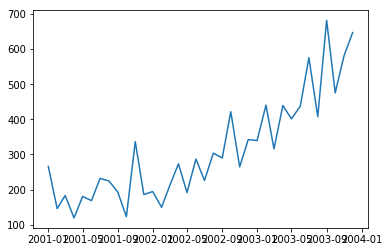

In [54]:
# plt.plot(series.MTH.values, series.SALES.values)
plt.plot(series)
plt.show()

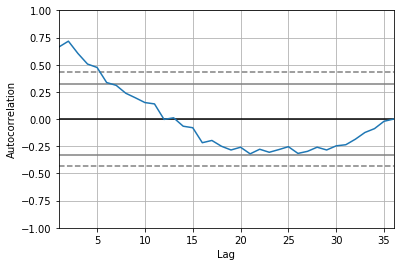

In [55]:
autocorrelation_plot(series)
plt.show()

In [56]:
# import numpy as np
# import pandas as pd
# from pandas.plotting import autocorrelation_plot
# %matplotlib inline
# import matplotlib.pyplot as plt
# dr = pd.date_range(start='1984-01-01', end='1984-12-31')
# df = pd.DataFrame(np.arange(len(dr)), index=dr, columns=["Values"])
# df
# df.info()
# autocorrelation_plot(df)
# plt.show()

D:\utils\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\utils\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.SALES   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Tue, 08 Jan 2019   AIC                            406.340
Time:                        15:58:24   BIC                            417.227
Sample:                    02-01-2001   HQIC                           410.098
                         - 12-01-2003                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.SALES    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.SALES    -0.6203      0.282     

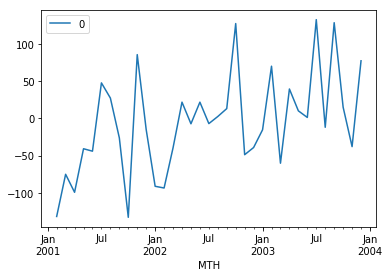

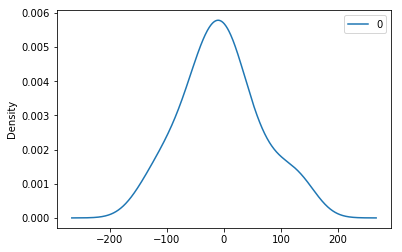

                0
count   35.000000
mean    -5.495218
std     68.132882
min   -133.296637
25%    -42.477890
50%     -7.186512
75%     24.748330
max    133.237936


In [63]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())